<a href="https://colab.research.google.com/github/lgregs/TCC-CD-USP/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpeza dos dados e EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/gregorio/TCC-CD-USP/archives/balancos_periodo_2008_2024.csv')
df

,Desc,Yıllık,9 Aylık,6 Aylık,3 Aylık,OriginalFileName,CompanyCode,Year
0,Dönen Varlıklar,9457559.0,12071214.0,15581108.0,8897663.0,EMNIS_2009.xlsx,EMNIS,2009
1,Nakit ve Nakit Benzerleri,1610426.0,23911.0,14434.0,48297.0,EMNIS_2009.xlsx,EMNIS,2009
2,Finansal Yatırımlar,0.0,0.0,0.0,0.0,EMNIS_2009.xlsx,EMNIS,2009
3,Ticari Alacaklar,5026287.0,8501402.0,11668645.0,5436925.0,EMNIS_2009.xlsx,EMNIS,2009
4,Finans Sektörü Faaliyetlerinden Alacaklar,0.0,0.0,0.0,0.0,EMNIS_2009.xlsx,EMNIS,2009
...,...,...,...,...,...,...,...,...
507207,Diğer Nakit Girişi/Çıkışı,0.0,0.0,0.0,0.0,DGNMO_2022.xlsx,DGNMO,2022
507208,Nakit ve Benzerlerindeki Değişim,380981383.0,78669533.0,89823875.0,-23447193.0,DGNMO_2022.xlsx,DGNMO,2022
507209,Diğer Nakit ve Nakit Benzerlerindeki Artış,0.0,0.0,0.0,0.0,DGNMO_2022.xlsx,DGNMO,2022
507210,Dönem Başı Nakit Değerler,140545109.0,49168829.0,49168829.0,49168829.0,DGNMO_2022.xlsx,DGNMO,2022


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507212 entries, 0 to 507211
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Desc              507212 non-null  object 
 1   Yıllık            496863 non-null  float64
 2   9 Aylık           496292 non-null  float64
 3   6 Aylık           497413 non-null  float64
 4   3 Aylık           497908 non-null  float64
 5   OriginalFileName  507212 non-null  object 
 6   CompanyCode       507212 non-null  object 
 7   Year              507212 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 31.0+ MB


In [4]:
df['Desc'].unique()

array(['Dönen Varlıklar', '  Nakit ve Nakit Benzerleri',
       '  Finansal Yatırımlar', '  Ticari Alacaklar',
       '  Finans Sektörü Faaliyetlerinden Alacaklar', '  Diğer Alacaklar',
       '  Stoklar', '  Canlı Varlıklar', '  Diğer Dönen Varlıklar',
       '    (Ara Toplam)',
       '  Satış Amacıyla Elde Tutulan Duran Varlıklar', 'Duran Varlıklar',
       '  Özkaynak Yöntemiyle Değerlenen Yatırımlar',
       '  Yatırım Amaçlı Gayrimenkuller', '  Maddi Duran Varlıklar',
       '  Şerefiye', '  Maddi Olmayan Duran Varlıklar',
       '  Ertelenmiş Vergi Varlığı', '  Diğer Duran Varlıklar',
       'TOPLAM VARLIKLAR', 'KAYNAKLAR', 'Kısa Vadeli Yükümlülükler',
       '  Finansal Borçlar', '  Diğer Finansal Yükümlülükler',
       '  Ticari Borçlar', '  Diğer Borçlar',
       '  Finans Sektörü Faaliyetlerinden Borçlar',
       '  Devlet Teşvik ve Yardımları', '  Dönem Karı Vergi Yükümlülüğü',
       '  Borç Karşılıkları', '  Diğer Kısa Vadeli Yükümlülükler',
       '  Satış Amaçlı Elde Tu

## Tradução
* Colunas e tipos de documento.
* Utilizei Google Tradutor.

In [5]:
colunas_traduzidas = {
    'Desc': 'Descricao',
    'Yıllık': 'Anual',
    '9 Aylık': '9_Meses',
    '6 Aylık': '6_Meses',
    '3 Aylık': '3_Meses',
    'Year':'Ano'
}

df = df.rename(columns=colunas_traduzidas)

In [6]:
# Usei o Google Tradutor
traducao_termos_desc = {
    'Dönen Varlıklar': 'Ativos Circulantes',
    '  Nakit ve Nakit Benzerleri': 'Caixa e Equivalentes de Caixa',
    '  Finansal Yatırımlar': 'Investimentos Financeiros',
    '  Ticari Alacaklar': 'Contas a Receber',
    '  Finans Sektörü Faaliyetlerinden Alacaklar': 'Contas a Receber de Atividades do Setor Financeiro',
    '  Diğer Alacaklar': 'Outros Recebíveis',
    '  Stoklar': 'Estoques',
    '  Canlı Varlıklar': 'Ativos Biológicos',
    '  Diğer Dönen Varlıklar': 'Outros Ativos Circulantes',
    '    (Ara Toplam)': '(Subtotal)',
    '  Satış Amacıyla Elde Tutulan Duran Varlıklar': 'Ativos Não Circulantes Mantidos para Venda',
    'Duran Varlıklar': 'Ativos Não Circulantes',
    '  Özkaynak Yöntemiyle Değerlenen Yatırımlar': 'Investimentos Avaliados pelo Método da Equivalência Patrimonial',
    '  Yatırım Amaçlı Gayrimenkuller': 'Imóveis de Investimento',
    '  Maddi Duran Varlıklar': 'Ativos Imobilizados',
    '  Şerefiye': 'Goodwill',
    '  Maddi Olmayan Duran Varlıklar': 'Ativos Intangíveis',
    '  Ertelenmiş Vergi Varlığı': 'Ativo Fiscal Diferido',
    '  Diğer Duran Varlıklar': 'Outros Ativos Não Circulantes',
    'TOPLAM VARLIKLAR': 'TOTAL DE ATIVOS',
    'KAYNAKLAR': 'PASSIVO E PATRIMÔNIO LÍQUIDO',
    'Kısa Vadeli Yükümlülükler': 'Passivos Circulantes',
    '  Finansal Borçlar': 'Dívidas Financeiras',
    '  Diğer Finansal Yükümlülükler': 'Outras Obrigações Financeiras',
    '  Ticari Borçlar': 'Contas a Pagar',
    '  Diğer Borçlar': 'Outras Dívidas',
    '  Finans Sektörü Faaliyetlerinden Borçlar': 'Dívidas de Atividades do Setor Financeiro',
    '  Devlet Teşvik ve Yardımları': 'Incentivos e Ajuda Governamental',
    '  Dönem Karı Vergi Yükümlülüğü': 'Obrigações Fiscais sobre o Lucro do Período',
    '  Borç Karşılıkları': 'Provisões para Dívidas',
    '  Diğer Kısa Vadeli Yükümlülükler': 'Outros Passivos Circulantes',
    '  Satış Amaçlı Elde Tutulan Duran Varlıklara İlişkin Yükümlülükler': 'Passivos Relacionados a Ativos Não Circulantes Mantidos para Venda',
    'Uzun Vadeli Yükümlülükler': 'Passivos Não Circulantes',
    '    Uzun vadeli karşılıklar': 'Provisões de Longo Prazo',
    '  Çalışanlara Sağlanan Faydalara İliş.Karş.': 'Provisões para Benefícios a Empregados',
    '  Ertelenmiş Vergi Yükümlülüğü': 'Passivo Fiscal Diferido',
    '  Diğer Uzun Vadeli Yükümlülükler': 'Outros Passivos Não Circulantes',
    'Özkaynaklar': 'Patrimônio Líquido',
    '  Ana Ortaklığa Ait Özkaynaklar': 'Patrimônio Líquido Atribuível aos Acionistas da Controladora',
    '  Ödenmiş Sermaye': 'Capital Social Integralizado',
    '  Karşılıklı İştirak Sermayesi Düzeltmesi (-)': 'Ajuste de Capital de Participação Mútua (-)',
    '  Hisse Senedi İhraç Primleri': 'Reservas de Capital de Emissão de Ações',
    '  Değer Artış Fonları': 'Fundos de Reavaliação / Valorização',
    '  Yabancı Para Çevrim Farkları': 'Diferenças de Conversão de Moeda Estrangeira',
    '  Kardan Ayrılan Kısıtlanmış Yedekler': 'Reservas Restritas Separadas do Lucro',
    '  Geçmiş Yıllar Kar/Zararları': 'Lucros/Prejuízos Acumulados',
    '  Dönem Net Kar/Zararı': 'Lucro/Prejuízo Líquido do Período',
    '  Diğer Özsermaye Kalemleri': 'Outros Itens do Patrimônio Líquido',
    '  Azınlık Payları': 'Participações de Não Controladores',
    'TOPLAM KAYNAKLAR': 'TOTAL DO PASSIVO E PATRIMÔNICO LÍQUIDO',
    'Sürdürülen Faaliyetler': 'Operações Continuadas',
    'Satış Gelirleri': 'Receita de Vendas',
    'Satışların Maliyeti (-)': 'Custo dos Produtos/Serviços Vendidos (-)',
    'Ticari Faaliyetlerden Diğer Kar (Zarar)': 'Outros Ganhos (Perdas) de Atividades Comerciais',
    'Ticari Faaliyetlerden Brüt Kar (Zarar)': 'Lucro Bruto (Prejuízo) de Atividades Comerciais',
    'Faiz, Ücret, Prim, Komisyon ve Diğer Gelirler': 'Receitas de Juros, Taxas, Prêmios, Comissões e Outras',
    'Faiz, Ücret, Prim, Komisyon ve Diğer Giderler (-)': 'Despesas de Juros, Taxas, Prêmios, Comissões e Outras (-)',
    'Finans Sektörü Faaliyetlerinden Diğer Kar (Zarar)': 'Outros Ganhos (Perdas) de Atividades do Setor Financeiro',
    'Finans Sektörü Faaliyetlerinden Brüt Kar (Zarar)': 'Lucro Bruto (Prejuízo) de Atividades do Setor Financeiro',
    'Diğer Gelir ve Giderler': 'Outras Receitas e Despesas',
    'BRÜT KAR (ZARAR)': 'LUCRO BRUTO (PREJUÍZO)',
    'Pazarlama, Satış ve Dağıtım Giderleri (-)': 'Despesas de Marketing, Vendas e Distribuição (-)',
    'Genel Yönetim Giderleri (-)': 'Despesas Gerais e Administrativas (-)',
    'Araştırma ve Geliştirme Giderleri (-)': 'Despesas de Pesquisa e Desenvolvimento (-)',
    'Diğer Faaliyet Gelirleri': 'Outras Receitas Operacionais',
    'Diğer Faaliyet Giderleri (-)': 'Outras Despesas Operacionais (-)',
    'Faaliyet Karı Öncesi Diğer Gelir ve Giderler': 'Outras Receitas e Despesas Antes do Lucro Operacional',
    'FAALİYET KARI (ZARARI)': 'LUCRO OPERACIONAL (PREJUÍZO)',
    'Net Faaliyet Kar/Zararı': 'Lucro/Prejuízo Operacional Líquido',
    'Özkaynak Yöntemiyle Değerlenen Yatırımların Kar/Zararlarındaki Paylar': 'Participação nos Lucros/Prejuízos de Investimentos Avaliados pelo Método da Equivalência Patrimonial',
    '(Esas Faaliyet Dışı) Finansal Gelirler': 'Receitas Financeiras (Não Operacionais)',
    '(Esas Faaliyet Dışı) Finansal Giderler (-)': 'Despesas Financeiras (Não Operacionais) (-)',
    'Vergi Öncesi Diğer Gelir ve Giderler': 'Outras Receitas e Despesas Antes do Imposto',
    'SÜRDÜRÜLEN FAaliyetLER VERGİ ÖNCESİ KARI (ZARARI)': 'LUCRO (PREJUÍZO) ANTES DO IMPOSTO DAS OPERAÇÕES CONTINUADAS',
    'Sürdürülen Faaliyetler Vergi Geliri (Gideri)': 'Receita (Despesa) de Imposto das Operações Continuadas',
    '  Dönem Vergi Geliri (Gideri)': 'Receita (Despesa) de Imposto do Período',
    '  Ertelenmiş Vergi Geliri (Gideri)': 'Receita (Despesa) de Imposto Diferido',
    '  Diğer Vergi Geliri (Gideri)': 'Outra Receita (Despesa) de Imposto',
    'SÜRDÜRÜLEN FAALİYETLER DÖNEM KARI/ZARARI': 'LUCRO/PREJUÍZO LÍQUIDO DO PERÍODO DAS OPERAÇÕES CONTINUADAS',
    'DURDURULAN FAALİYETLER': 'OPERAÇÕES DESCONTINUADAS',
    'Durdurulan Faaliyetler Vergi Sonrası Dönem Karı (Zararı)': 'Lucro (Prejuízo) do Período Após Imposto das Operações Descontinuadas',
    'DÖNEM KARI (ZARARI)': 'LUCRO (PREJUÍZO) DO PERÍODO',
    'Dönem Kar/Zararının Dağılımı': 'Distribuição do Lucro/Prejuízo do Período',
    'Azınlık Payları': 'Participações de Não Controladores',
    'Ana Ortaklık Payları': 'Participações da Controladora',
    'Hisse Başına Kazanç': 'Lucro por Ação',
    'Seyreltilmiş Hisse Başına Kazanç': 'Lucro por Ação Diluído',
    'Sürdürülen Faaliyetlerden Hisse Başına Kazanç': 'Lucro por Ação de Operações Continuadas',
    'Sürdürülen Faaliyetlerden Seyreltilmiş Hisse Başına Kazanç': 'Lucro por Ação Diluído de Operações Continuadas',
    'Amortisman Giderleri': 'Despesas de Amortização',
    'Kıdem Tazminatı': 'Indenização por Antiguidade',
    'Finansman Giderleri': 'Despesas Financeiras',
    'Yurtiçi Satışlar': 'Vendas Domésticas',
    'Yurtdışı Satışlar': 'Vendas Internacionais',
    'Net Yabancı Para Pozisyonu': 'Posição Cambial Líquida',
    '  Müşteri Sözleşmelerinden Doğan Varlıklar': 'Ativos de Contratos com Clientes',
    '  Kullanım Hakkı Varlıkları': 'Ativos de Direito de Uso',
    '  Müşteri Söz. Doğan Yük.': 'Passivos de Contratos com Clientes',
    '  Ertelenmiş Gelirler (Müşteri Söz. Doğan Yük. Dış.Kal.)': 'Receitas Diferidas (Exceto Passivos de Contratos com Clientes)',
    '  Müşteri Söz.Doğan Yük.': '  Passivos de Contratos com Clientes',
    '  Ertelenmiş Gelirler (Müşteri Söz.Doğan Yük. Dış.Kal.)': 'Receitas Diferidas (Exceto Passivos de Contratos com Clientes)',
    '  Yatırım Faaliyetlerinden Gelirler': 'Receitas de Atividades de Investimento',
    '  Yatırım Faaliyetlerinden Giderler (-)': 'Despesas de Atividades de Investimento (-)',
    '  Diğer Gelir ve Giderler': 'Outras Receitas e Despesas',
    'Finansman Gideri Öncesi Faaliyet Karı/Zararı': 'Lucro/Prejuízo Operacional Antes das Despesas Financeiras',
    'Parasal net yabancı para varlık/(yükümlülük) pozisyonu': 'Posição Líquida (Ativo/Passivo) Monetária em Moeda Estrangeira',
    'Net YPP (Hedge Dahil)': 'Posição Cambial Líquida (Incluindo Hedge)',
    ' İşletme Faaliyetlerinden Kaynaklanan Net Nakit': 'Fluxo de Caixa Líquido das Atividades Operacionais',
    ' Düzeltme Öncesi Kar': 'Lucro Antes dos Ajustes',
    ' Düzeltmeler:': 'Ajustes:',
    '  Amortisman & İtfa Payları': 'Amortização e Quotas de Exaustão',
    '  Karşılıklardaki Değişim': 'Mudança nas Provisões',
    '  Diğer Gelir/ Gider': 'Outras Receitas/Despesas',
    ' İşletme Sermayesinde Değişikler Öncesi Faaliyet Karı (+)': 'Lucro Operacional Antes das Mudanças no Capital de Giro (+)',
    '  İşletme Sermayesindeki Değişiklikler': 'Mudanças no Capital de Giro',
    ' Esas Faaliyet ile İlgili Oluşan Nakit (+)': 'Caixa Gerado por Atividades Principais (+)',
    '  Diğer İşletme Faaliyetlerinden Nakit': 'Fluxo de Caixa de Outras Atividades Operacionais',
    '  Sabit Sermaye Yatırımları': '  Investimentos em Capital Fixo',
    '  Diğer Yatırım Faaliyetlerinden Nakit': 'Fluxo de Caixa de Outras Atividades de Investimento',
    ' Yatırım Faaliyetlerinden Kaynaklanan Nakit': 'Fluxo de Caixa das Atividades de Investimento',
    'Serbest Nakit Akım': 'Fluxo de Caixa Livre',
    'Finansal Borçlardaki Değişim': 'Variação nas Dívidas Financeiras',
    'Temettü Ödemeleri': 'Pagamento de Dividendos',
    'Sermaye Artırımı': 'Aumento de Capital',
    'Diğer Finansman Faaliyetlerinden Nakit': 'Fluxo de Caixa de Outras Atividades de Financiamento',
    'Finansman Faaliyetlerden Kaynaklanan Nakit': 'Fluxo de Caixa das Atividades de Financiamento',
    'Yab. Para Çev. Fark. Etk. Önc.Nak.Ve Nak. Benz. Net Artış/Azalış': 'Aumento/Diminuição Líquido de Caixa e Equivalentes de Caixa Antes do Efeito das Diferenças de Conversão de Moeda Estrangeira',
    ' Yab.ı Para Çevrim Fark. Nakit Ve Nakit Benz. Üzerindeki Etkisi': 'Efeito das Diferenças de Conversão de Moeda Estrangeira sobre o Caixa e Equivalentes de Caixa',
    ' Diğer Nakit Girişi/Çıkışı': 'Outras Entradas/Saídas de Caixa',
    'Nakit ve Benzerlerindeki Değişim': 'Variação no Caixa e Equivalentes',
    'Diğer Nakit ve Nakit Benzerlerindeki Artış': 'Aumento em Outros Caixas e Equivalentes de Caixa',
    'Dönem Başı Nakit Değerler': 'Valores de Caixa no Início do Período',
    'Dönem Sonu Nakit': 'Caixa no Final do Período',
    ' Ertelenmiş Vergi Geliri (Gideri)': 'Receita (Despesa) de Imposto Diferido'
}

df['Descricao'] = df['Descricao'].map(traducao_termos_desc)

print(df['Descricao'].unique())

['Ativos Circulantes' 'Caixa e Equivalentes de Caixa'
 'Investimentos Financeiros' 'Contas a Receber'
 'Contas a Receber de Atividades do Setor Financeiro' 'Outros Recebíveis'
 'Estoques' 'Ativos Biológicos' 'Outros Ativos Circulantes' '(Subtotal)'
 'Ativos Não Circulantes Mantidos para Venda' 'Ativos Não Circulantes'
 'Investimentos Avaliados pelo Método da Equivalência Patrimonial'
 'Imóveis de Investimento' 'Ativos Imobilizados' 'Goodwill'
 'Ativos Intangíveis' 'Ativo Fiscal Diferido'
 'Outros Ativos Não Circulantes' 'TOTAL DE ATIVOS'
 'PASSIVO E PATRIMÔNIO LÍQUIDO' 'Passivos Circulantes'
 'Dívidas Financeiras' 'Outras Obrigações Financeiras' 'Contas a Pagar'
 'Outras Dívidas' 'Dívidas de Atividades do Setor Financeiro'
 'Incentivos e Ajuda Governamental'
 'Obrigações Fiscais sobre o Lucro do Período' 'Provisões para Dívidas'
 'Outros Passivos Circulantes'
 'Passivos Relacionados a Ativos Não Circulantes Mantidos para Venda'
 'Passivos Não Circulantes' 'Provisões de Longo Prazo'
 'P

## Tratativa de Valores Nulos

In [7]:
df

,Descricao,Anual,9_Meses,6_Meses,3_Meses,OriginalFileName,CompanyCode,Ano
0,Ativos Circulantes,9457559.0,12071214.0,15581108.0,8897663.0,EMNIS_2009.xlsx,EMNIS,2009
1,Caixa e Equivalentes de Caixa,1610426.0,23911.0,14434.0,48297.0,EMNIS_2009.xlsx,EMNIS,2009
2,Investimentos Financeiros,0.0,0.0,0.0,0.0,EMNIS_2009.xlsx,EMNIS,2009
3,Contas a Receber,5026287.0,8501402.0,11668645.0,5436925.0,EMNIS_2009.xlsx,EMNIS,2009
4,Contas a Receber de Atividades do Setor Financ...,0.0,0.0,0.0,0.0,EMNIS_2009.xlsx,EMNIS,2009
...,...,...,...,...,...,...,...,...
507207,Outras Entradas/Saídas de Caixa,0.0,0.0,0.0,0.0,DGNMO_2022.xlsx,DGNMO,2022
507208,Variação no Caixa e Equivalentes,380981383.0,78669533.0,89823875.0,-23447193.0,DGNMO_2022.xlsx,DGNMO,2022
507209,Aumento em Outros Caixas e Equivalentes de Caixa,0.0,0.0,0.0,0.0,DGNMO_2022.xlsx,DGNMO,2022
507210,Valores de Caixa no Início do Período,140545109.0,49168829.0,49168829.0,49168829.0,DGNMO_2022.xlsx,DGNMO,2022


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507212 entries, 0 to 507211
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Descricao         503343 non-null  object 
 1   Anual             496863 non-null  float64
 2   9_Meses           496292 non-null  float64
 3   6_Meses           497413 non-null  float64
 4   3_Meses           497908 non-null  float64
 5   OriginalFileName  507212 non-null  object 
 6   CompanyCode       507212 non-null  object 
 7   Ano               507212 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 31.0+ MB


In [9]:
df["CompanyCode"].nunique()

227

In [10]:
df.isnull().sum()

Descricao            3869
Anual               10349
9_Meses             10920
6_Meses              9799
3_Meses              9304
OriginalFileName        0
CompanyCode             0
Ano                     0
dtype: int64

In [11]:
(df.isnull().sum() / len(df)) * 100

Descricao           0.762797
Anual               2.040370
9_Meses             2.152946
6_Meses             1.931934
3_Meses             1.834341
OriginalFileName    0.000000
CompanyCode         0.000000
Ano                 0.000000
dtype: float64

In [12]:
# Count duplicates
df.duplicated().sum()

np.int64(26567)

* Após identificar muitos valores duplicados zerados, vou tratar primeiro dos zerados e nulos depois volto neles, pois boa parte deles se trata de indicadores zerados e seria interressante analisar isso ... 

In [13]:
df[df.duplicated()]

,Descricao,Anual,9_Meses,6_Meses,3_Meses,OriginalFileName,CompanyCode,Ano
13,Contas a Receber de Atividades do Setor Financ...,0.0,0.0,0.0,0.0,EMNIS_2009.xlsx,EMNIS,2009
17,Ativos Biológicos,0.0,0.0,0.0,0.0,EMNIS_2009.xlsx,EMNIS,2009
41,Outras Obrigações Financeiras,0.0,0.0,0.0,0.0,EMNIS_2009.xlsx,EMNIS,2009
44,Dívidas de Atividades do Setor Financeiro,0.0,0.0,0.0,0.0,EMNIS_2009.xlsx,EMNIS,2009
45,Incentivos e Ajuda Governamental,0.0,0.0,0.0,0.0,EMNIS_2009.xlsx,EMNIS,2009
...,...,...,...,...,...,...,...,...
507084,Ativos Biológicos,0.0,0.0,0.0,0.0,DGNMO_2022.xlsx,DGNMO,2022
507111,Outras Obrigações Financeiras,0.0,0.0,0.0,0.0,DGNMO_2022.xlsx,DGNMO,2022
507115,Dívidas de Atividades do Setor Financeiro,0.0,0.0,0.0,0.0,DGNMO_2022.xlsx,DGNMO,2022
507116,Incentivos e Ajuda Governamental,0.0,0.0,0.0,0.0,DGNMO_2022.xlsx,DGNMO,2022


In [14]:
df[df.duplicated()].describe()

,Anual,9_Meses,6_Meses,3_Meses,Ano
count,2.624600e+04,26134.000000,26158.000000,26215.000000,26567.000000
mean,6.449332e+02,-28.229892,-26.488761,-10.140874,2016.616178
std,8.100873e+04,3650.919577,3210.935152,1426.770948,4.867828
min,-1.247865e+06,-566628.000000,-491498.000000,-227805.000000,2008.000000
25%,0.000000e+00,0.000000,0.000000,0.000000,2012.000000
50%,0.000000e+00,0.000000,0.000000,0.000000,2017.000000
75%,0.000000e+00,0.000000,0.000000,0.000000,2021.000000
max,9.237000e+06,13385.000000,115.000000,156.000000,2024.000000


* Muitos Valores Nulos ao longo do DF.

In [15]:
# Checar quantos tipos diferentes de indicadores existem.
doc_count = df["Descricao"].nunique()
doc_types = df["Descricao"].unique()

print("Quantidade de Indicadores:", doc_count)
print("Indicadores:")
print(doc_types)

Quantidade de Indicadores: 129
Indicadores:
['Ativos Circulantes' 'Caixa e Equivalentes de Caixa'
 'Investimentos Financeiros' 'Contas a Receber'
 'Contas a Receber de Atividades do Setor Financeiro' 'Outros Recebíveis'
 'Estoques' 'Ativos Biológicos' 'Outros Ativos Circulantes' '(Subtotal)'
 'Ativos Não Circulantes Mantidos para Venda' 'Ativos Não Circulantes'
 'Investimentos Avaliados pelo Método da Equivalência Patrimonial'
 'Imóveis de Investimento' 'Ativos Imobilizados' 'Goodwill'
 'Ativos Intangíveis' 'Ativo Fiscal Diferido'
 'Outros Ativos Não Circulantes' 'TOTAL DE ATIVOS'
 'PASSIVO E PATRIMÔNIO LÍQUIDO' 'Passivos Circulantes'
 'Dívidas Financeiras' 'Outras Obrigações Financeiras' 'Contas a Pagar'
 'Outras Dívidas' 'Dívidas de Atividades do Setor Financeiro'
 'Incentivos e Ajuda Governamental'
 'Obrigações Fiscais sobre o Lucro do Período' 'Provisões para Dívidas'
 'Outros Passivos Circulantes'
 'Passivos Relacionados a Ativos Não Circulantes Mantidos para Venda'
 'Passivos Não

In [16]:
# Checar valores nulos em todos os periodos de tempo
null_counts = df[["Anual", "9_Meses", "6_Meses", "3_Meses"]].isnull().sum()
print("\nNull counts por coluna:")
print(null_counts)



Null counts por coluna:
Anual      10349
9_Meses    10920
6_Meses     9799
3_Meses     9304
dtype: int64


In [17]:
# 3. Checar quantidade de colunas com dados completos em todos os periodos de tempo
rows_with_complete_data = df.dropna(subset=["Anual", "9_Meses", "6_Meses", "3_Meses"])
print("\nTotal rows:", len(df))
print("Linhas com os 4 periodos de tempo nao nulos:", len(rows_with_complete_data))


Total rows: 507212
Linhas com os 4 periodos de tempo nao nulos: 487591


In [18]:
# Quantidade de valores nulos por indicador
missing_per_ind = (
    df.groupby("Descricao")[["Anual","9_Meses","6_Meses","3_Meses"]]
      .apply(lambda x: x.isnull().sum().sum())
      .sort_values(ascending=False)
)

print("Nulos por Indicador:/n")
print(missing_per_ind)

Nulos por Indicador:/n
Descricao
Posição Cambial Líquida (Incluindo Hedge)                         1225
Posição Líquida (Ativo/Passivo) Monetária em Moeda Estrangeira    1225
Ativos de Contratos com Clientes                                  1134
Receitas Diferidas (Exceto Passivos de Contratos com Clientes)    1134
Outras Receitas e Despesas                                        1007
                                                                  ... 
Reservas de Capital de Emissão de Ações                             53
TOTAL DO PASSIVO E PATRIMÔNICO LÍQUIDO                              53
TOTAL DE ATIVOS                                                     53
Vendas Domésticas                                                   53
Vendas Internacionais                                               53
Length: 129, dtype: int64


In [19]:
# Porcentagem
rows_per_ind = df.groupby("Descricao").size()
missing_percentage = (missing_per_ind / (rows_per_ind * 4)) * 100

ranked_missing = pd.DataFrame({
    "Total Rows": rows_per_ind,
    "Total Missing": missing_per_ind,
    "Missing %": missing_percentage.round(2)
}).sort_values("Missing %", ascending=False)

print("/nPorcentagem de Nulos:")
print(ranked_missing.head(20))

/nPorcentagem de Nulos:
                                                    Total Rows  Total Missing  \
Descricao                                                                       
Posição Cambial Líquida (Incluindo Hedge)                 2742           1225   
Posição Líquida (Ativo/Passivo) Monetária em Mo...        2742           1225   
Despesas de Atividades de Investimento (-)                2396            954   
Receitas de Atividades de Investimento                    2396            954   
  Investimentos em Capital Fixo                           2396            953   
Caixa Gerado por Atividades Principais (+)                2396            953   
Ajustes:                                                  2396            953   
Aumento em Outros Caixas e Equivalentes de Caixa          2396            953   
Amortização e Quotas de Exaustão                          2396            953   
Fluxo de Caixa Líquido das Atividades Operacionais        2396            953   
Flux

In [20]:
# Contagem de nulos por empresa
missing_per_company = (
    df.groupby("CompanyCode")[["Anual","9_Meses","6_Meses","3_Meses"]]
      .apply(lambda x: x.isnull().sum().sum())
      .sort_values(ascending=False)
)

In [21]:
print("Missing values ranked by CompanyCode:\n")
print(missing_per_company)

Missing values ranked by CompanyCode:

CompanyCode
PGSUS    1745
EUHOL     896
IHGZT     792
MERKO     652
BJKAS     591
         ... 
NUGYO      14
TATGD      14
SONME      14
SNPAM      14
BIMAS       0
Length: 227, dtype: int64


In [22]:
# Agrupando por quantidade de linhas por empresa
rows_per_company = df.groupby("CompanyCode").size()
missing_percentage = (missing_per_company / (rows_per_company * 4)) * 100

ranked_missing = pd.DataFrame({
    "Total Rows": rows_per_company,
    "Total Missing": missing_per_company,
    "Missing %": missing_percentage.round(2)
}).sort_values("Missing %", ascending=False)

print("\nRanking de empresas com mais nulos (top 20):")
print(ranked_missing.head(20))


Ranking de empresas com mais nulos (top 20):
             Total Rows  Total Missing  Missing %
CompanyCode                                      
PGSUS              2214           1745      19.70
EUHOL              2206            896      10.15
IHGZT              2235            792       8.86
MERKO              2264            652       7.20
BJKAS              2272            591       6.50
TSPOR              2272            560       6.16
MRGYO              2296            514       5.60
ALGYO              2264            485       5.36
GSRAY              2230            467       5.24
MARTI              2288            461       5.04
FENER              2214            419       4.73
OZGYO              2206            396       4.49
DOHOL              2296            396       4.31
AVGYO              2280            348       3.82
EREGL              2280            346       3.79
DOAS               2288            347       3.79
ALCTL              2280            346       3.79
PENG

In [23]:
# Contagem de valores zerados por indicador
zero_per_ind = (
    (rows_with_complete_data[["Descricao","Anual","9_Meses","6_Meses","3_Meses"]]
     .groupby("Descricao")[["Anual","9_Meses","6_Meses","3_Meses"]]
     .apply(lambda x: (x == 0).sum().sum()))
    .sort_values(ascending=False)
)

print("Contagem de valores zerados por indicador:\n")
print(zero_per_ind.head(20))

Contagem de valores zerados por indicador:

Descricao
Dívidas de Atividades do Setor Financeiro                             30208
Ativos Biológicos                                                     30158
Incentivos e Ajuda Governamental                                      30045
Contas a Receber de Atividades do Setor Financeiro                    29732
Outras Obrigações Financeiras                                         28518
Outras Receitas e Despesas                                            22711
Participações de Não Controladores                                    17881
Estoques                                                              17319
Investimentos Financeiros                                             17030
Operações Continuadas                                                 15352
PASSIVO E PATRIMÔNIO LÍQUIDO                                          15352
Outra Receita (Despesa) de Imposto                                    15322
Outros Ganhos (Perdas) de Atividad

In [24]:
# Countagem de valores zerados por periodo de tempo
zero_per_period = (rows_with_complete_data[["Anual","9_Meses","6_Meses","3_Meses"]] == 0).sum()
zero_per_period = zero_per_period.sort_values(ascending=False)

print("\nPeriodos com a maior quantidades de valores zerados:")
print(zero_per_period)


Periodos com a maior quantidades de valores zerados:
3_Meses    208965
6_Meses    206458
9_Meses    204981
Anual      201854
dtype: int64


In [25]:
# 3. DF dos indicadores com mais valores zerados com porcentagem
rows_per_doc = rows_with_complete_data.groupby("Descricao").size()
zero_percentage_doc = (zero_per_ind / (rows_per_doc * 4)) * 100

zero_ranked_doc = pd.DataFrame({
    "Total Rows": rows_per_doc,
    "Zeroed Count": zero_per_ind,
    "Zeroed %": zero_percentage_doc.round(2)
}).sort_values("Zeroed %", ascending=False)

print("\nRanking dos zerados:")
print(zero_ranked_doc.head(20))


Ranking dos zerados:
                                                    Total Rows  Zeroed Count  \
Descricao                                                                      
Aumento em Outros Caixas e Equivalentes de Caixa          1934          7736   
PASSIVO E PATRIMÔNIO LÍQUIDO                              3838         15352   
Distribuição do Lucro/Prejuízo do Período                 3827         15308   
Outras Entradas/Saídas de Caixa                           1934          7736   
Operações Continuadas                                     3838         15352   
OPERAÇÕES DESCONTINUADAS                                  3827         15308   
Outra Receita (Despesa) de Imposto                        3838         15322   
Outros Ganhos (Perdas) de Atividades do Setor F...        3838         15313   
Outras Receitas e Despesas Antes do Lucro Opera...        3838         15244   
Dívidas de Atividades do Setor Financeiro                 7676         30208   
Outras Receitas e 

In [26]:
#zero_ranked_doc.to_csv('C:/Users/gregorio/TCC-CD-USP/archives/zero_ranked_doc.csv')

* Most data are complete — missingness is concentrated in a few indicators and companies, which may correspond to less common financial statements (like FX or investment flows).

-----

* Vamos dropar indicadores com mais de 95% dos dados zerados e ver o que nos resta.

In [27]:
indicators_to_drop = ranked_missing[ranked_missing["Missing %"] > 10].index.tolist()
zeroed_to_drop = zero_ranked_doc[zero_ranked_doc["Zeroed %"] > 95].index.tolist()

drop_list = list(set(indicators_to_drop + zeroed_to_drop))
df_clean = df[~df["Descricao"].isin(drop_list)]
print("Dropped indicators:", len(drop_list))

Dropped indicators: 24


* e fazer pivot da tabela para visualizar de uma forma diferente para que cada linha seja referente e um ano contabil da empresa.

In [28]:
df_wide = df_clean.pivot_table(
    index=["CompanyCode", "Ano"],
    columns="Descricao",
    values="Anual",
    aggfunc="mean"
).reset_index()


In [29]:
df_wide

Descricao,CompanyCode,Ano,Investimentos em Capital Fixo,(Subtotal),Ajuste de Capital de Participação Mútua (-),Ajustes:,Amortização e Quotas de Exaustão,Ativo Fiscal Diferido,Ativos Circulantes,Ativos Imobilizados,...,Receitas de Atividades de Investimento,Reservas Restritas Separadas do Lucro,Reservas de Capital de Emissão de Ações,TOTAL DE ATIVOS,TOTAL DO PASSIVO E PATRIMÔNICO LÍQUIDO,Valores de Caixa no Início do Período,Variação nas Dívidas Financeiras,Variação no Caixa e Equivalentes,Vendas Domésticas,Vendas Internacionais
0,ADEL,2008,NaN,2.701881e+07,0.0,NaN,NaN,0.000000e+00,4.558265e+07,1.471694e+07,...,NaN,2957664.0,0.0,6.075340e+07,6.075340e+07,NaN,NaN,NaN,87260709.0,4865016.0
1,ADEL,2009,NaN,2.701881e+07,0.0,NaN,NaN,0.000000e+00,4.558265e+07,1.471694e+07,...,NaN,2957664.0,0.0,6.075340e+07,6.075340e+07,NaN,NaN,NaN,87260709.0,4865016.0
2,ADEL,2010,NaN,3.387275e+07,0.0,NaN,NaN,0.000000e+00,5.862145e+07,1.386170e+07,...,NaN,4729678.0,0.0,7.304626e+07,7.304626e+07,NaN,NaN,NaN,104427004.0,5399918.0
3,ADEL,2011,NaN,4.391425e+07,0.0,NaN,NaN,1.139980e+05,7.555084e+07,1.476274e+07,...,NaN,5450104.0,0.0,9.103184e+07,9.103184e+07,NaN,NaN,NaN,132355741.0,6157158.0
4,ADEL,2012,NaN,5.461005e+07,0.0,NaN,NaN,3.464180e+05,9.348416e+07,1.613625e+07,...,NaN,6378203.0,0.0,1.113401e+08,1.113401e+08,NaN,NaN,NaN,162911678.0,7611179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,ZOREN,2020,-1.881500e+08,6.037722e+09,0.0,1.872685e+09,6.032930e+08,4.888430e+08,4.047594e+09,1.061079e+10,...,7.188400e+07,7931000.0,916000.0,2.140257e+10,2.140257e+10,8.231210e+08,-4.692610e+08,-113212000.0,0.0,0.0
3841,ZOREN,2021,-3.353620e+08,7.986534e+09,0.0,2.968941e+09,6.905980e+08,6.717470e+08,6.471306e+09,1.878782e+10,...,2.098000e+06,7931000.0,1448000.0,3.542642e+10,3.542642e+10,7.099090e+08,5.478490e+08,451735000.0,0.0,0.0
3842,ZOREN,2022,-9.923150e+08,3.006555e+10,0.0,-7.099029e+09,3.668976e+09,1.700569e+09,2.259070e+10,5.698022e+10,...,6.251000e+06,100624000.0,9961000.0,1.177445e+11,1.177445e+11,3.205222e+09,2.920434e+09,574086000.0,0.0,0.0
3843,ZOREN,2023,-1.219082e+09,2.698698e+10,0.0,-1.209898e+10,6.194368e+09,6.855687e+09,2.862619e+10,5.836801e+10,...,5.993617e+09,145280000.0,46984000.0,1.422292e+11,1.422292e+11,5.456515e+09,-1.093341e+10,-532490000.0,0.0,0.0


In [30]:
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3845 entries, 0 to 3844
Columns: 109 entries, CompanyCode to Vendas Internacionais
dtypes: float64(107), int64(1), object(1)
memory usage: 3.2+ MB


In [31]:
df_wide.describe()

Descricao,Ano,Investimentos em Capital Fixo,(Subtotal),Ajuste de Capital de Participação Mútua (-),Ajustes:,Amortização e Quotas de Exaustão,Ativo Fiscal Diferido,Ativos Circulantes,Ativos Imobilizados,Ativos Intangíveis,...,Receitas de Atividades de Investimento,Reservas Restritas Separadas do Lucro,Reservas de Capital de Emissão de Ações,TOTAL DE ATIVOS,TOTAL DO PASSIVO E PATRIMÔNICO LÍQUIDO,Valores de Caixa no Início do Período,Variação nas Dívidas Financeiras,Variação no Caixa e Equivalentes,Vendas Domésticas,Vendas Internacionais
count,3845.000000,2.121000e+03,3.843000e+03,3.843000e+03,2.121000e+03,2.121000e+03,3.843000e+03,3.843000e+03,3.843000e+03,3.843000e+03,...,2.121000e+03,3.843000e+03,3.843000e+03,3.843000e+03,3.843000e+03,2.121000e+03,2.121000e+03,2.121000e+03,3.843000e+03,3.843000e+03
mean,2015.986996,-8.765036e+08,7.410827e+09,-1.092212e+06,1.039267e+09,6.916639e+08,1.944830e+08,7.376417e+09,2.856224e+09,7.966703e+08,...,2.619760e+08,2.658983e+08,7.580172e+07,1.558276e+10,1.558276e+10,2.581835e+09,5.750709e+08,5.957493e+08,5.158407e+09,2.871957e+09
std,4.885509,4.310680e+09,8.599257e+10,4.990996e+07,9.050598e+09,3.798636e+09,1.749519e+09,7.969365e+10,1.601711e+10,6.496143e+09,...,1.678013e+09,1.448529e+09,6.870790e+08,1.395819e+11,1.395819e+11,2.178670e+10,5.096914e+09,8.827769e+09,4.164139e+10,2.473690e+10
min,2008.000000,-7.609200e+10,1.557730e+05,-9.860104e+08,-7.531810e+10,-4.879236e+08,0.000000e+00,4.229000e+03,0.000000e+00,0.000000e+00,...,-7.548033e+09,0.000000e+00,-3.459780e+08,2.872728e+06,2.872728e+06,3.690000e+02,-2.457609e+10,-5.591800e+10,-2.535905e+06,0.000000e+00
25%,2012.000000,-2.188445e+08,4.737804e+07,0.000000e+00,3.419900e+04,2.029766e+06,0.000000e+00,5.412951e+07,1.001742e+07,5.074900e+04,...,4.056400e+04,7.632290e+05,0.000000e+00,1.347170e+08,1.347170e+08,7.311722e+06,-1.063703e+07,-7.217147e+06,0.000000e+00,0.000000e+00
50%,2016.000000,-2.294756e+07,1.959270e+08,0.000000e+00,4.600300e+07,2.157076e+07,5.163230e+05,2.324590e+08,9.821852e+07,1.087256e+06,...,3.446370e+06,7.897000e+06,0.000000e+00,5.703304e+08,5.703304e+08,5.570042e+07,0.000000e+00,2.612322e+06,1.119165e+08,1.626900e+07
75%,2020.000000,-7.871160e+05,1.115353e+09,0.000000e+00,3.322840e+08,1.578209e+08,1.302696e+07,1.283072e+09,6.814120e+08,2.745228e+07,...,4.687500e+07,5.782660e+07,5.895800e+05,3.125218e+09,3.125218e+09,4.574630e+08,8.064230e+07,8.279311e+07,9.753233e+08,2.185022e+08
max,2024.000000,2.568003e+09,2.576004e+12,1.344243e+09,2.955470e+11,7.230600e+10,5.421551e+10,2.472313e+12,4.258600e+11,1.393042e+11,...,5.537500e+10,3.569178e+10,2.100476e+10,4.127744e+12,4.127744e+12,6.316890e+11,1.160314e+11,3.396500e+11,1.263918e+12,6.630600e+11


In [32]:
df_wide.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
Descricao,,,,,,,,
Ano,3845.0,2.015990e+03,4.890000e+00,2.008000e+03,2012.0,2016.0,2.020000e+03,2.024000e+03
Investimentos em Capital Fixo,2121.0,-8.765036e+08,4.310680e+09,-7.609200e+10,-218844516.0,-22947559.0,-7.871160e+05,2.568003e+09
(Subtotal),3843.0,7.410827e+09,8.599257e+10,1.557730e+05,47378040.5,195926998.5,1.115353e+09,2.576004e+12
Ajuste de Capital de Participação Mútua (-),3843.0,-1.092212e+06,4.990996e+07,-9.860104e+08,0.0,0.0,0.000000e+00,1.344243e+09
Ajustes:,2121.0,1.039267e+09,9.050598e+09,-7.531810e+10,34199.0,46003000.0,3.322840e+08,2.955470e+11
...,...,...,...,...,...,...,...,...
Valores de Caixa no Início do Período,2121.0,2.581835e+09,2.178670e+10,3.690000e+02,7311722.0,55700417.0,4.574630e+08,6.316890e+11
Variação nas Dívidas Financeiras,2121.0,5.750709e+08,5.096914e+09,-2.457609e+10,-10637033.0,0.0,8.064230e+07,1.160314e+11
Variação no Caixa e Equivalentes,2121.0,5.957493e+08,8.827769e+09,-5.591800e+10,-7217147.0,2612322.0,8.279311e+07,3.396500e+11


* Outliers

In [33]:
(df_wide.describe().T[['mean', 'std', 'min', 'max']]
   .assign(range=lambda x: x['max'] - x['min'])
   .sort_values('range', ascending=False)
   .head(20))


,mean,std,min,max,range
Descricao,,,,,
Despesas de Amortização,3.442502e+09,1.883647e+11,-1.789412e+06,1.167617e+13,1.167617e+13
TOTAL DO PASSIVO E PATRIMÔNICO LÍQUIDO,1.558276e+10,1.395819e+11,2.872728e+06,4.127744e+12,4.127741e+12
TOTAL DE ATIVOS,1.558276e+10,1.395819e+11,2.872728e+06,4.127744e+12,4.127741e+12
Passivos Circulantes,7.476735e+09,9.267640e+10,2.703000e+03,2.693843e+12,2.693843e+12
(Subtotal),7.410827e+09,8.599257e+10,1.557730e+05,2.576004e+12,2.576004e+12
Ativos Circulantes,7.376417e+09,7.969365e+10,4.229000e+03,2.472313e+12,2.472313e+12
Receita de Vendas,9.721629e+09,6.527400e+10,-1.164758e+09,1.760013e+12,1.761178e+12
Ativos Não Circulantes,8.206309e+09,6.226638e+10,0.000000e+00,1.655431e+12,1.655431e+12
Custo dos Produtos/Serviços Vendidos (-),-8.058347e+09,5.554084e+10,-1.437943e+12,0.000000e+00,1.437943e+12


* Detect Skewness & Kurtosis

To find asymmetric or heavy-tailed variables:

In [34]:
skew_kurt = df_wide.drop(columns=['CompanyCode', 'Ano']).agg(['skew', 'kurt']).T
skew_kurt['abs_skew'] = skew_kurt['skew'].abs()
skew_kurt = skew_kurt.sort_values('abs_skew', ascending=False)

print("Most skewed variables:")
print(skew_kurt.head(15))


Most skewed variables:
                                                         skew         kurt  \
Descricao                                                                    
Despesas de Amortização                             61.970804  3841.248743   
Lucro (Prejuízo) do Período Após Imposto das Op...  48.485683  2671.812876   
Ativos Não Circulantes Mantidos para Venda          42.703926  2104.591079   
Lucro por Ação Diluído de Operações Continuadas    -36.827567  1563.304577   
Lucro por Ação Diluído                             -36.791220  1561.259461   
Lucro por Ação de Operações Continuadas            -35.636084  1488.229058   
Posição Líquida (Ativo/Passivo) Monetária em Mo... -35.108552  1518.724625   
Receita (Despesa) de Imposto Diferido               33.128787  1615.085552   
Lucro por Ação                                     -32.969376  1367.198207   
Outros Passivos Circulantes                         31.431363  1105.787401   
Variação no Caixa e Equivalentes         

In [35]:
skew_kurt

,skew,kurt,abs_skew
Descricao,,,
Despesas de Amortização,61.970804,3841.248743,61.970804
Lucro (Prejuízo) do Período Após Imposto das Operações Descontinuadas,48.485683,2671.812876,48.485683
Ativos Não Circulantes Mantidos para Venda,42.703926,2104.591079,42.703926
Lucro por Ação Diluído de Operações Continuadas,-36.827567,1563.304577,36.827567
Lucro por Ação Diluído,-36.791220,1561.259461,36.791220
...,...,...,...
Mudanças no Capital de Giro,-4.434318,191.658354,4.434318
Receita (Despesa) de Imposto das Operações Continuadas,-1.386835,534.171682,1.386835
Diferenças de Conversão de Moeda Estrangeira,0.914561,204.813730,0.914561


Visual Sampling of Distributions

Plot just a few representative variables:

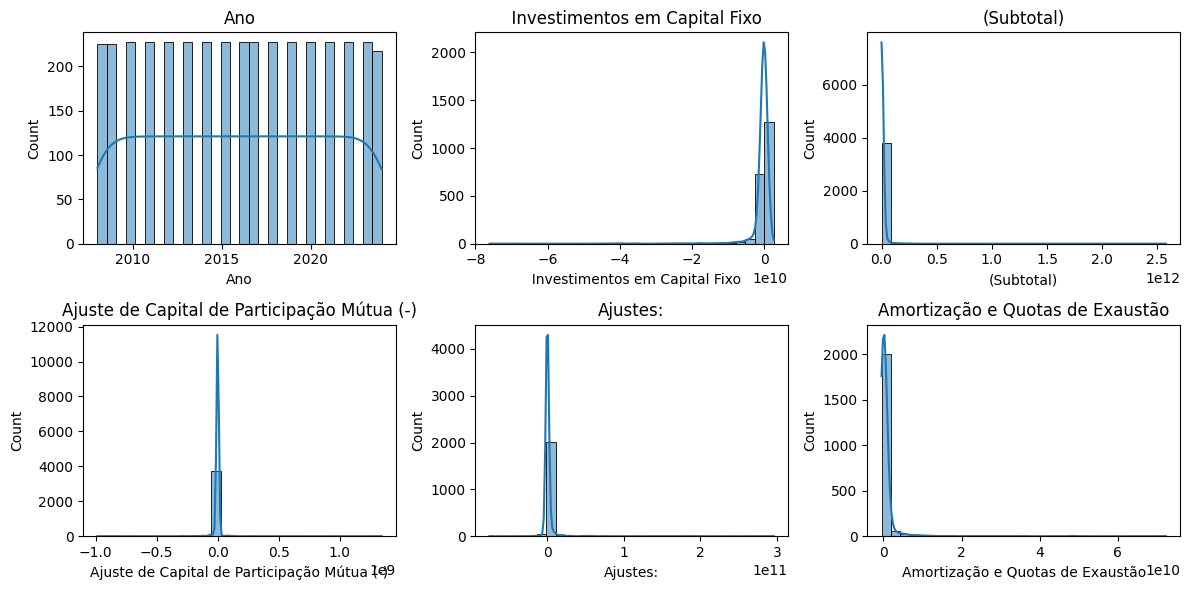

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sample_cols = df_wide.select_dtypes('number').columns[:6]

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
for col, ax in zip(sample_cols, axes.flatten()):
    sns.histplot(df_wide[col], kde=True, ax=ax, bins=30)
    ax.set_title(col)
plt.tight_layout()
plt.show()


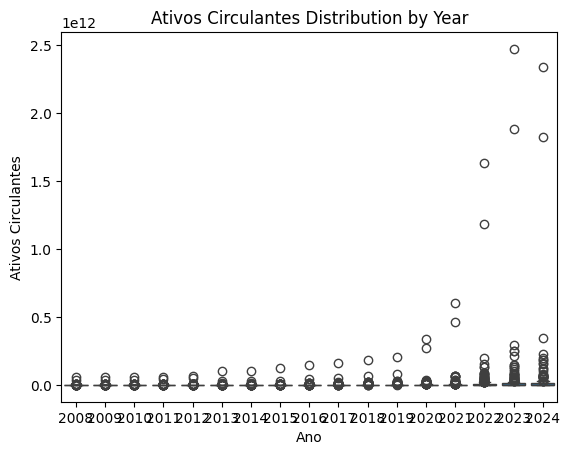

In [37]:
sns.boxplot(x='Ano', y='Ativos Circulantes', data=df_wide)
plt.title('Ativos Circulantes Distribution by Year')
plt.show()


<Axes: xlabel='Descricao', ylabel='Descricao'>

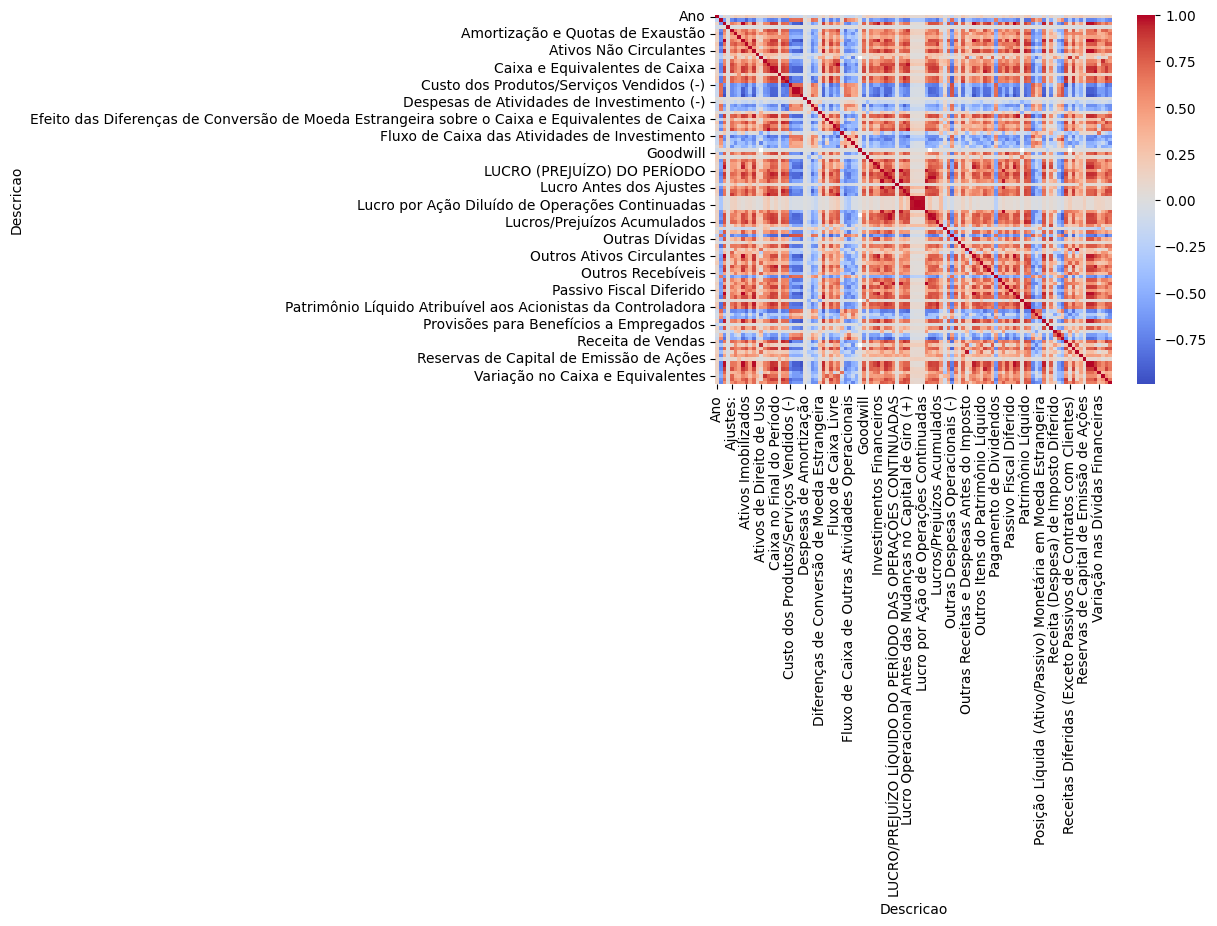

In [38]:
sns.heatmap(df_wide.corr(numeric_only=True), cmap='coolwarm', center=0)


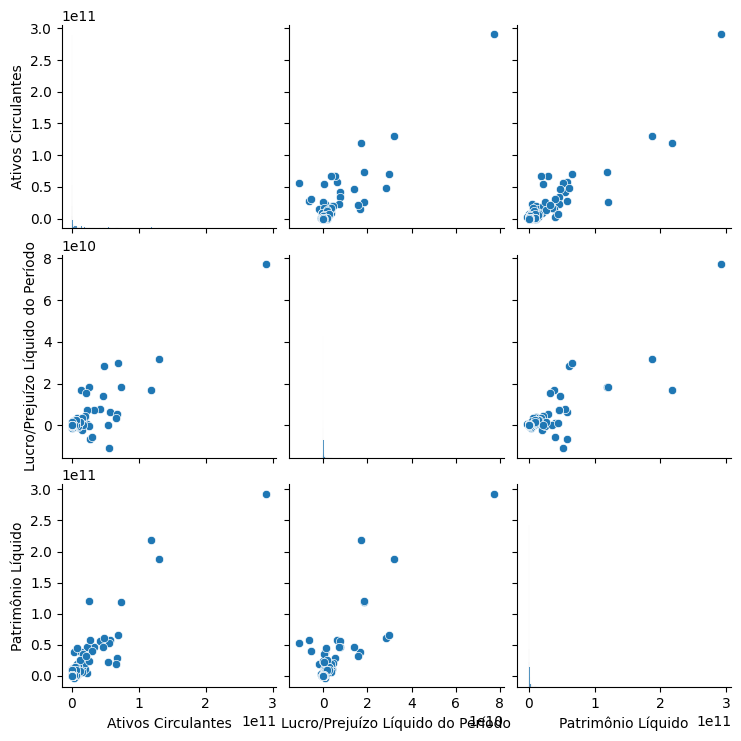

In [39]:
sns.pairplot(df_wide[['Ativos Circulantes','Lucro/Prejuízo Líquido do Período','Patrimônio Líquido']].sample(500))


In [40]:
from ydata_profiling import ProfileReport

# 🪄 Step 1: Ensure no sampling exceeds population
# If you have < 10k rows, just use the full dataset
df_small = df_wide.copy()

# 🧠 Step 2: Generate a minimal lightweight report
profile = ProfileReport(
    df_small,
    title="Credit Default EDA (Minimal)",
    explorative=False,   # less visual complexity, faster
    minimal=True,        # disables heavy computations
    progress_bar=False
)

# 💾 Step 3: Export report to HTML
profile.to_file("EDA_light.html")
print("✅ EDA report generated successfully: EDA_light.html")


c:\Users\gregorio\TCC-CD-USP\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 109/109 [00:00<00:00, 177.39it/s]


✅ EDA report generated successfully: EDA_light.html


### Conclusões do EDA.

* **Overview:**

* The dataset has 3,845 rows and 109 columns after being transformed into a “wide” format (one row per company-year, columns as indicators and periods).

Most variables are numerical financial indicators across time windows (Anual, 9, 6, 3 months).

* Missing Values

Several indicators have missing values, especially those related to cash flow and foreign exchange exposure (e.g., Posição Cambial Líquida, Fluxo de Caixa Livre).

Some indicators are 100% zeroed, meaning they may not be useful for modeling — possibly because many companies don’t report those metrics.

🟠 Action: Consider dropping variables with >95% missing or zero values.

💰 Distribution Insights

Many indicators show high skewness, with long tails — typical of financial data (some companies are much larger than others).

A log transformation or scaling might help for future modeling to stabilize variance and improve normality.

🔗 Correlations

Some strong correlations are expected between related metrics, e.g.:

Ativos Totais vs Passivo Total

Receita de Vendas vs Lucro Bruto

However, overall correlations are not excessive, meaning there is informational diversity across indicators.

🟢 Action: Use correlation-based feature selection (e.g. remove one of each highly correlated pair, |r| > 0.9).

🏢 Company and Year Patterns

Missing data and indicator reporting vary by company and by year, suggesting that not all companies report full financial statements every period.

Temporal analysis may reveal macroeconomic effects (e.g., crises in specific years).

🧠 Overall EDA Conclusions

The dataset is rich and multi-dimensional, suitable for building a credit default prediction model.

Some features should be cleaned:

Drop or impute high-missing or zero columns.

Normalize or log-transform skewed numerical features.

Before modeling, consider creating derived financial ratios (e.g., liquidity, leverage, profitability), as they are more predictive of credit default.

Sampling or dimensionality reduction (e.g., PCA) may help handle the high number of columns.

In [41]:
df_wide

Descricao,CompanyCode,Ano,Investimentos em Capital Fixo,(Subtotal),Ajuste de Capital de Participação Mútua (-),Ajustes:,Amortização e Quotas de Exaustão,Ativo Fiscal Diferido,Ativos Circulantes,Ativos Imobilizados,...,Receitas de Atividades de Investimento,Reservas Restritas Separadas do Lucro,Reservas de Capital de Emissão de Ações,TOTAL DE ATIVOS,TOTAL DO PASSIVO E PATRIMÔNICO LÍQUIDO,Valores de Caixa no Início do Período,Variação nas Dívidas Financeiras,Variação no Caixa e Equivalentes,Vendas Domésticas,Vendas Internacionais
0,ADEL,2008,NaN,2.701881e+07,0.0,NaN,NaN,0.000000e+00,4.558265e+07,1.471694e+07,...,NaN,2957664.0,0.0,6.075340e+07,6.075340e+07,NaN,NaN,NaN,87260709.0,4865016.0
1,ADEL,2009,NaN,2.701881e+07,0.0,NaN,NaN,0.000000e+00,4.558265e+07,1.471694e+07,...,NaN,2957664.0,0.0,6.075340e+07,6.075340e+07,NaN,NaN,NaN,87260709.0,4865016.0
2,ADEL,2010,NaN,3.387275e+07,0.0,NaN,NaN,0.000000e+00,5.862145e+07,1.386170e+07,...,NaN,4729678.0,0.0,7.304626e+07,7.304626e+07,NaN,NaN,NaN,104427004.0,5399918.0
3,ADEL,2011,NaN,4.391425e+07,0.0,NaN,NaN,1.139980e+05,7.555084e+07,1.476274e+07,...,NaN,5450104.0,0.0,9.103184e+07,9.103184e+07,NaN,NaN,NaN,132355741.0,6157158.0
4,ADEL,2012,NaN,5.461005e+07,0.0,NaN,NaN,3.464180e+05,9.348416e+07,1.613625e+07,...,NaN,6378203.0,0.0,1.113401e+08,1.113401e+08,NaN,NaN,NaN,162911678.0,7611179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,ZOREN,2020,-1.881500e+08,6.037722e+09,0.0,1.872685e+09,6.032930e+08,4.888430e+08,4.047594e+09,1.061079e+10,...,7.188400e+07,7931000.0,916000.0,2.140257e+10,2.140257e+10,8.231210e+08,-4.692610e+08,-113212000.0,0.0,0.0
3841,ZOREN,2021,-3.353620e+08,7.986534e+09,0.0,2.968941e+09,6.905980e+08,6.717470e+08,6.471306e+09,1.878782e+10,...,2.098000e+06,7931000.0,1448000.0,3.542642e+10,3.542642e+10,7.099090e+08,5.478490e+08,451735000.0,0.0,0.0
3842,ZOREN,2022,-9.923150e+08,3.006555e+10,0.0,-7.099029e+09,3.668976e+09,1.700569e+09,2.259070e+10,5.698022e+10,...,6.251000e+06,100624000.0,9961000.0,1.177445e+11,1.177445e+11,3.205222e+09,2.920434e+09,574086000.0,0.0,0.0
3843,ZOREN,2023,-1.219082e+09,2.698698e+10,0.0,-1.209898e+10,6.194368e+09,6.855687e+09,2.862619e+10,5.836801e+10,...,5.993617e+09,145280000.0,46984000.0,1.422292e+11,1.422292e+11,5.456515e+09,-1.093341e+10,-532490000.0,0.0,0.0


In [42]:
df_wide.to_csv('C:/Users/gregorio/TCC-CD-USP/archives/df_wide.csv', index=False)